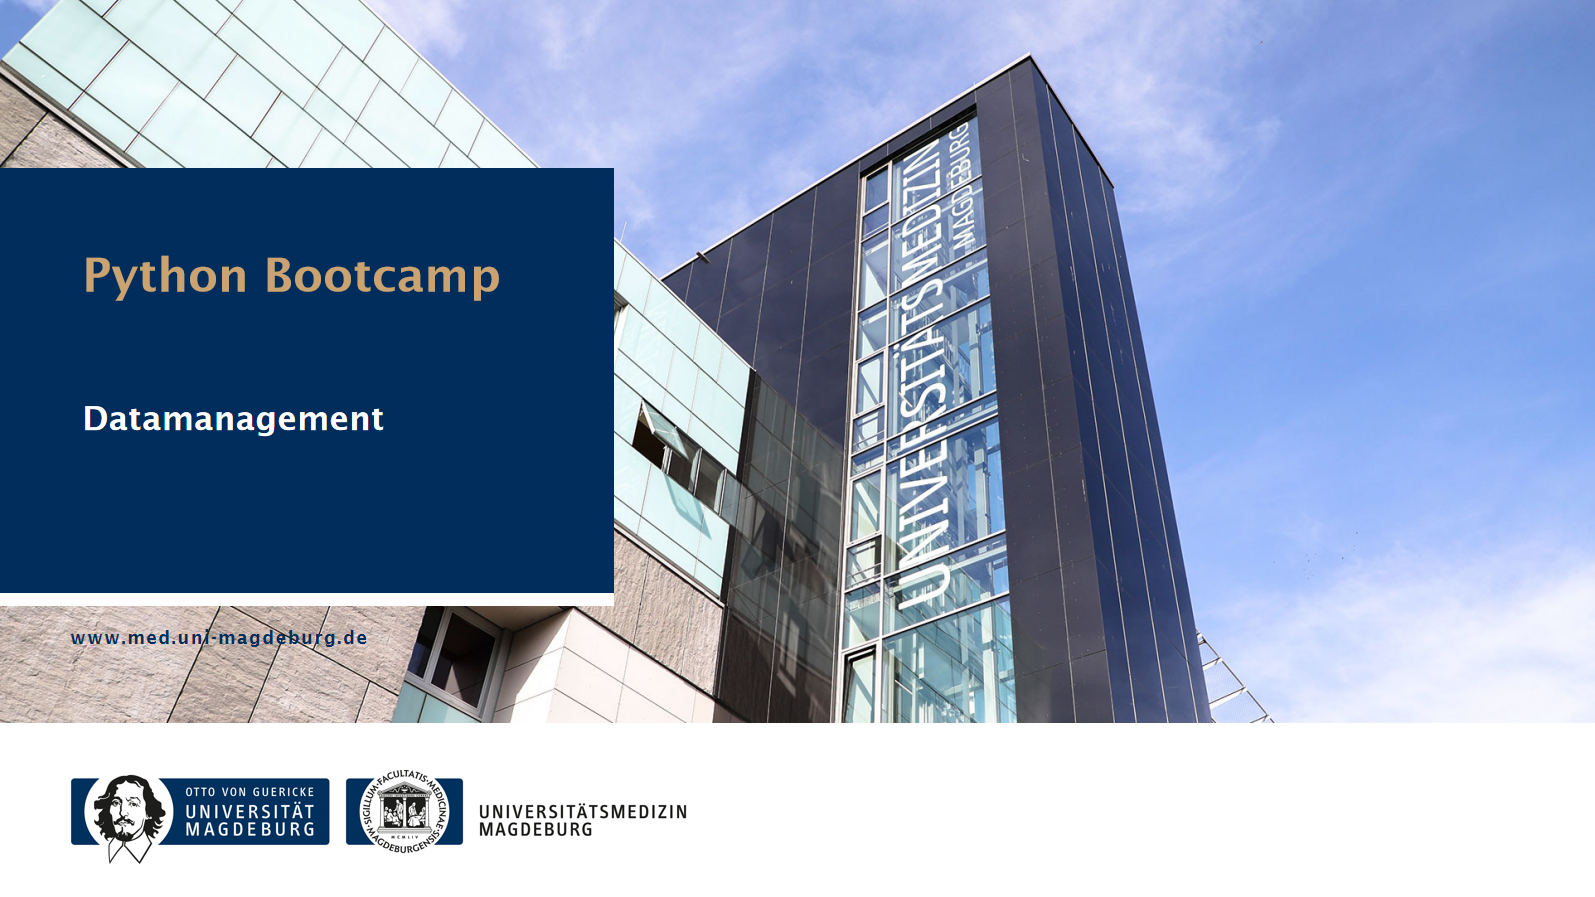

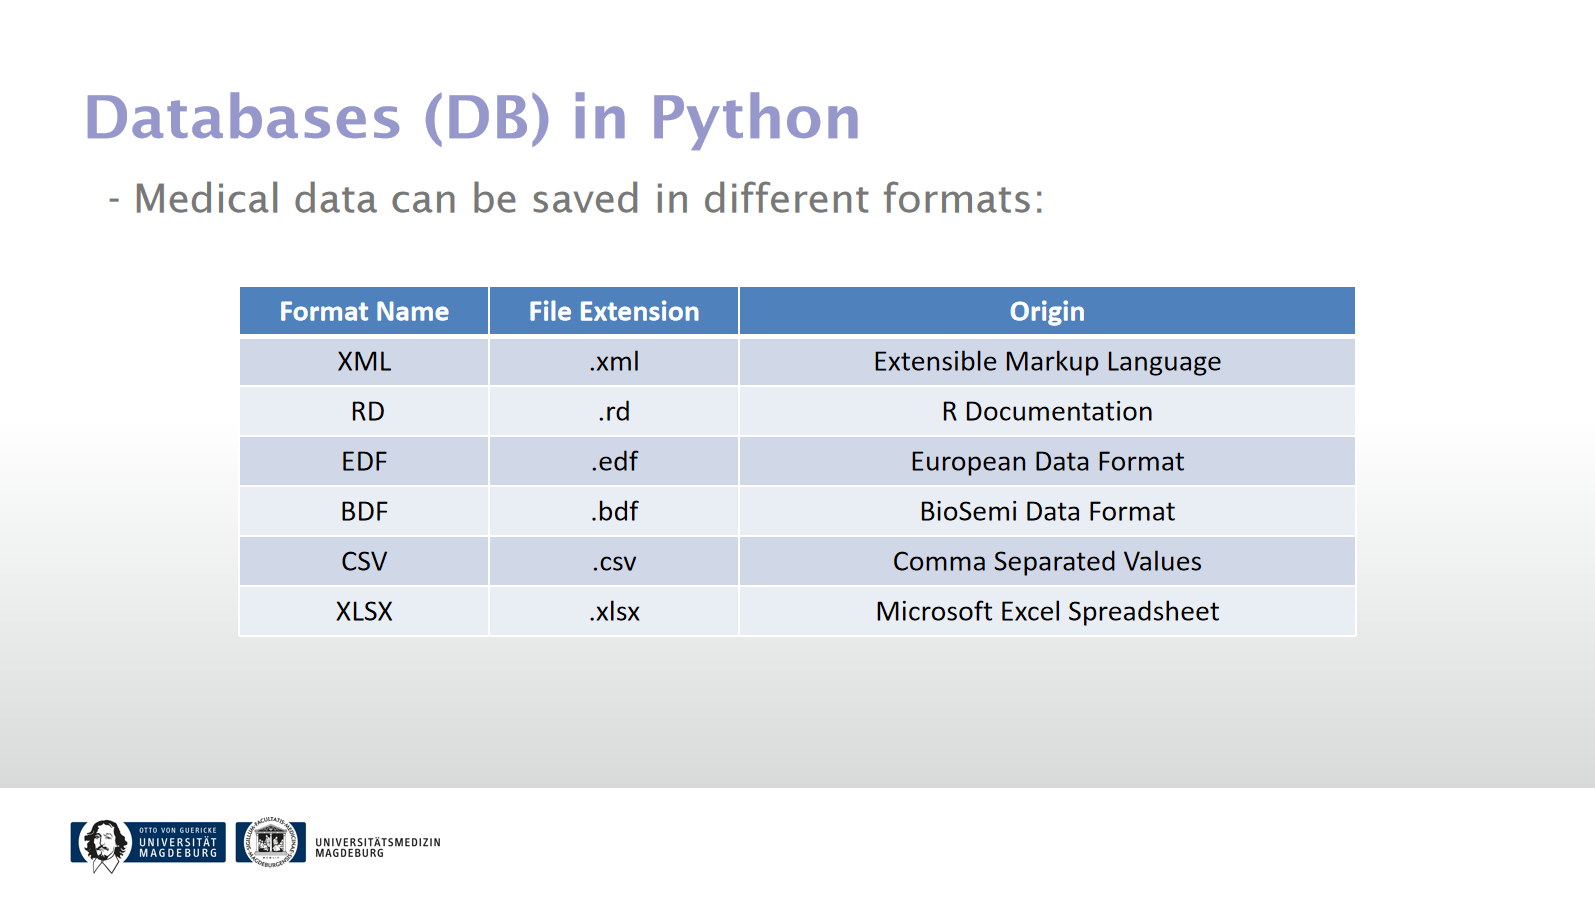

## 0.1 CSV

In [37]:
import pandas as pd

dat2 = pd.read_csv("Data/Data_Entry_2017.csv")
dat2.head()

,Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000001_000,Cardiomegaly,0,1,058Y,M,PA,2682,2749,0.143,0.143
1,00000001_001,Cardiomegaly|Emphysema,1,1,058Y,M,PA,2894,2729,0.143,0.143
2,00000001_002,Cardiomegaly|Effusion,2,1,058Y,M,PA,2500,2048,0.168,0.168
3,00000002_000,No Finding,0,2,081Y,M,PA,2500,2048,0.171,0.171
4,00000003_000,Hernia,0,3,081Y,F,PA,2582,2991,0.143,0.143


## 0.2 XLSX

In [38]:
dat3 = pd.read_excel("Data/ESAC-Net_report_2021_downloadable_tables.xlsx",sheet_name='D1_J01A_AC',skiprows=1)
dat3.head()

C:\Users\nasta\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Sparkline Group extension is not supported and will be removed
  warn(msg)


,Country name,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Time series\n2012-2021,Trend,Compound annual growth rate (CAGR)
0,Austria,1.0811,1.2715,1.0630,0.9867,0.8552,0.6303,0.3634,0.317269,0.2789,0.338315,NaN,↓,-0.121100
1,Belgium,2.1101,2.1607,2.1000,2.0341,1.9940,1.9161,1.8735,1.861300,1.6286,1.809078,NaN,↓,-0.016957
2,Bulgaria,1.7702,1.7590,1.7934,1.7009,1.6783,1.6337,1.6176,1.681700,2.1863,2.559688,NaN,-,0.041828
3,Croatia,1.1858,1.1919,1.1234,1.1426,1.0235,0.9952,0.9792,0.928000,0.7900,0.978971,NaN,↓,-0.021072
4,Cyprus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 0.3 XML

In [39]:
from xml.etree import ElementTree as ET                     # Parse XML file in a tree structure

# parse an xml file by name
file = ET.parse('Data/naaccr-xml-sample-v210-abstract-10.xml')

# What main data our file has?
root=file.getroot() # fetch the root element of the file
print('root element of your file is:', root)
print('tag of the root element is:',root.tag)      # the data we have-->NaaccrData

print() # print new line
# What is the subselement of each root? 
print('First subelement of each root is;',root[0].tag)  # patient
print('number of patients is',len(root))    # how many patients 
for x in root: # for all root subelements
    print(x.tag, x.attrib) # print each subelement's tag , attribute
print()

# What is the first subselement of each data? 
print('First subelement of each patient is;',root[0][0].tag)  # Item
print('number of Items for each patient is',len(root[0]), ': 21 Items and 1 Tumor')    # how many Items for each patient 
for x in root[0]: # for all patient subelements
    print(x.tag, x.attrib) # print each subelement's tag , attribute
    
for x in root[0]:
    if len(x)!=0:
        print(len(x),'Items for each Tumor subelement:')
        for y in x:
            print(y.tag, y.attrib)

root element of your file is: <Element '{http://naaccr.org/naaccrxml}NaaccrData' at 0x000001CAEE0B8C70>
tag of the root element is: {http://naaccr.org/naaccrxml}NaaccrData

First subelement of each root is; {http://naaccr.org/naaccrxml}Patient
number of patients is 10
{http://naaccr.org/naaccrxml}Patient {}
{http://naaccr.org/naaccrxml}Patient {}
{http://naaccr.org/naaccrxml}Patient {}
{http://naaccr.org/naaccrxml}Patient {}
{http://naaccr.org/naaccrxml}Patient {}
{http://naaccr.org/naaccrxml}Patient {}
{http://naaccr.org/naaccrxml}Patient {}
{http://naaccr.org/naaccrxml}Patient {}
{http://naaccr.org/naaccrxml}Patient {}
{http://naaccr.org/naaccrxml}Patient {}

First subelement of each patient is; {http://naaccr.org/naaccrxml}Item
number of Items for each patient is 22 : 21 Items and 1 Tumor
{http://naaccr.org/naaccrxml}Item {'naaccrId': 'nhiaDerivedHispOrigin'}
{http://naaccr.org/naaccrxml}Item {'naaccrId': 'raceNapiia'}
{http://naaccr.org/naaccrxml}Item {'naaccrId': 'nameMiddle'}
{ht

### 0.3.1 Converting xml to pandas dataframe

In [40]:
import numpy as np

# parse an xml file by name
file = ET.parse('Data/naaccr-xml-sample-v210-abstract-10.xml')
root=file.getroot() # fetch the root element of the file
#mldict = XmlDictConfig(root)

#for x in root.iter():
    #print(x)
def xml2df(root):
    all_records=[]
    
    for i, child in enumerate(root): #patient
        record={}
        my_dict={}
        values=[]
        for subchild in child:
            #print(subchild)
            values.append(subchild.tag.split('}')[1])
            #for i in len(np.unique(values)):
                #print(list(np.unique(values))[i])
            for key in list(np.unique(values)):
                my_dict[key]=values.count(key)
            record[child.tag.split('}')[1]]=my_dict
        #print(record)      
        all_records.append(record)
    return pd.DataFrame(all_records)

df=xml2df(root)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Patient
0,"{'Item': 21, 'Tumor': 1}"
1,"{'Item': 21, 'Tumor': 1}"
2,"{'Item': 21, 'Tumor': 1}"
3,"{'Item': 21, 'Tumor': 1}"
4,"{'Item': 24, 'Tumor': 1}"


## 0.4 RD

In [41]:
import gzip
from Utilities.EEG_load_function import import_eeg_file

# Import data from one trial from participant 338 in control group
fc = gzip.open('Data/SMNI_CMI_TRAIN/co2c0000347/co2c0000347.rd.000.gz', 'rb')
dfc = import_eeg_file(fc)
dfc.head()

subject   co2c0000347                                                          \
trial               0                                                           
alcoholic       False                                                           
match             obj                                                           
err             False                                                           
sensor            AF1    AF2    AF7    AF8    AFZ     C1     C2     C3     C4   
sample                                                                          
0              -1.953 -4.517  1.862 -1.251 -2.502  0.214 -0.916  2.167 -0.875   
1              -3.418 -3.540  1.373  2.655 -3.967  0.214 -0.427  1.678 -0.387   
2              -4.395 -2.563  1.373  4.120 -3.967 -0.275 -1.404  1.678 -0.875   
3              -3.906 -3.052  1.862  2.167 -3.967 -0.275 -1.892  0.702 -2.340   
4              -3.418 -3.540  2.350  0.214 -3.479 -0.275 -2.380  0.702 -2.828   

subject           ...                                                   \
trial             ...                                                    
alcoholic         ...                                                    
match             ...                                                    
err               ...                                                    
sensor        C5  ...    PO8    POZ     PZ     T7     T8    TP7    TP8   
sample            ...                                                    
0          5.412  ...  0.885 -2.574 -2.848  6.978  2.228  4.852  2.706   
1          4.924  ...  0.397 -2.085 -2.360  6.978  1.740  4.852  1.729   
2          3.947  ... -0.580 -2.085 -2.848  5.514  1.251  4.364 -0.224   
3          1.994  ... -1.068 -2.574 -3.337  4.049  1.251  3.876 -1.200   
4          1.506  ... -0.092 -2.085 -3.337  3.072  2.228  4.852 -0.712   

subject                             
trial                               
alcoholic                           
match                               
err                                 
sensor             X      Y     nd  
sample                              
0          19.999001  8.606 -0.346  
1          10.234000  6.653  0.142  
2          -8.321000  4.211  0.631  
3         -25.899000  2.258  1.119  
4         -29.806000  3.235  2.096  

[5 rows x 64 columns]

## 0.5 EDF

In [42]:
import mne
raw = mne.io.read_raw_edf('Data/test_generator.edf').load_data()
print('Information of the data is:',raw.info)

Extracting EDF parameters from C:\Users\nasta\OneDrive\Dokumente\GitHub\python-bootcamp\notebooks\Datamanagement\Data\test_generator.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 179999  =      0.000 ...   899.995 secs...
Information of the data is: <Info | 8 non-empty values
 bads: []
 ch_names: F4, F3, X10, FP2, P4, C4, P3, C3, X9, FP1, F8, F7, DC01, DC04, ...
 chs: 16 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: 2008-10-02 14:27:00 UTC
 nchan: 16
 projs: []
 sfreq: 200.0 Hz
 subject_info: 1 item (dict)
>


## 0.6 BDF

In [43]:
from biosemipy import bdf

dat1 = bdf.BDF("Data/BDFtestfiles/Newtest17-256.bdf")
print(type(dat1))

<class 'biosemipy.bdf.BDF'>


# 1. Lung deseases data analysis

## 1.1 Data Analysis

In [44]:
import pandas as pd

df = pd.read_csv('./Data/Data_Entry_2017.csv')
df.head()

,Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000001_000,Cardiomegaly,0,1,058Y,M,PA,2682,2749,0.143,0.143
1,00000001_001,Cardiomegaly|Emphysema,1,1,058Y,M,PA,2894,2729,0.143,0.143
2,00000001_002,Cardiomegaly|Effusion,2,1,058Y,M,PA,2500,2048,0.168,0.168
3,00000002_000,No Finding,0,2,081Y,M,PA,2500,2048,0.171,0.171
4,00000003_000,Hernia,0,3,081Y,F,PA,2582,2991,0.143,0.143


### 1.1.1 Data cleaning

drop unused columns and keep the desired columns of the dataframe

In [45]:
df = df[['Index','Finding Labels','Follow-up #','Patient ID','Patient Age','Patient Gender']]
df.head()

,Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender
0,00000001_000,Cardiomegaly,0,1,058Y,M
1,00000001_001,Cardiomegaly|Emphysema,1,1,058Y,M
2,00000001_002,Cardiomegaly|Effusion,2,1,058Y,M
3,00000002_000,No Finding,0,2,081Y,M
4,00000003_000,Hernia,0,3,081Y,F


In [46]:
pathology_list = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia']

for pathology in pathology_list:
    df[pathology] = df['Finding Labels'].apply(lambda x: 1 if pathology in x else 0) #Function to apply to each column or row
    
df.head()

,Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia
0,00000001_000,Cardiomegaly,0,1,058Y,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001,Cardiomegaly|Emphysema,1,1,058Y,M,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,00000001_002,Cardiomegaly|Effusion,2,1,058Y,M,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,00000002_000,No Finding,0,2,081Y,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,00000003_000,Hernia,0,3,081Y,F,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### 1.1.2 Display number of each deseases by patient gender

In [47]:
# values in the columns in the 'pathology_list' will be printed for each row of'Patient Gender' column
# change the column name 'variable' to 'Category' and 'value' to 'Count'
data1 = pd.melt(df,                             #dataframe
             id_vars = ['Patient Gender'],        #columns to keep
             value_vars = list(pathology_list), #variables with values of those columns
             var_name = 'Category',             #change 'variable' name to 'Category'
             value_name = 'Count')              #change 'value'  name to 'Count'
# Let's keep only those rows that have Count>0
data1 = data1.loc[data1.Count > 0]

In [48]:
# Let's create a 'Nothing' column with value 1 if 'No Finding' was in that row of the 'Finding Labels' column  and 0 if not
df['Nothing'] = df['Finding Labels'].apply(lambda x: 1 if 'No Finding' in x else 0)
data2 = pd.melt(df,
             id_vars=['Patient Gender'],
             value_vars = list(['Nothing']),
             var_name = 'Category',
             value_name = 'Count')
# Let's keep only those rows that have Count>0
data2 = data2.loc[data2.Count>0]

### 1.1.3 Plot Pathology and Non-pathology counts in female and male cases

In [49]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec      # grid layout to place subplots within a figure.
import seaborn as sns                       # visualization

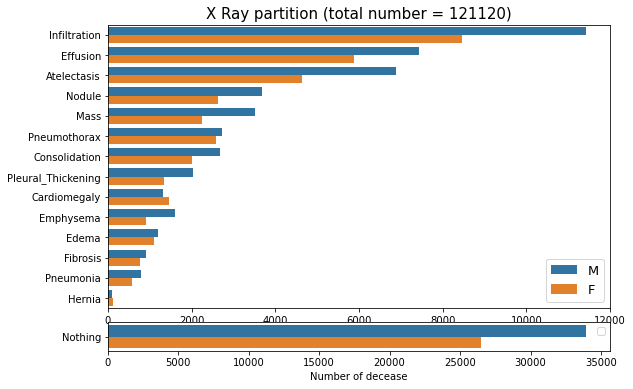

In [68]:
# Let's plot
plt.figure(figsize=(10,3)) # generate a new figure
ax1 = plt.subplot(gs[:7, :]) # ax1 to plot the first 7 rows
ax2 = plt.subplot(gs[7, :])  # ax2 to plot the last row
g = sns.countplot(y='Category', hue='Patient Gender', data=data1, ax=ax1, order = data1['Category'].value_counts().index)
ax1.set(ylabel="",xlabel="")
ax1.figure.set_size_inches(9, 6)
ax1.legend(fontsize=13)
ax1.set_title('X Ray partition (total number = 121120)', fontsize=15)
ax1.set_xlim([0,12000])
# Plot 'Nothing' counts for male and female
g = sns.countplot(y='Category', hue='Patient Gender', data=data2, ax=ax2)
ax2.set(ylabel="", xlabel="Number of decease")
ax2.legend('')
plt.subplots_adjust(hspace=.5)

### 1.1.4 Plot Patient Age counts in female and male cases

In [51]:
import numpy as np

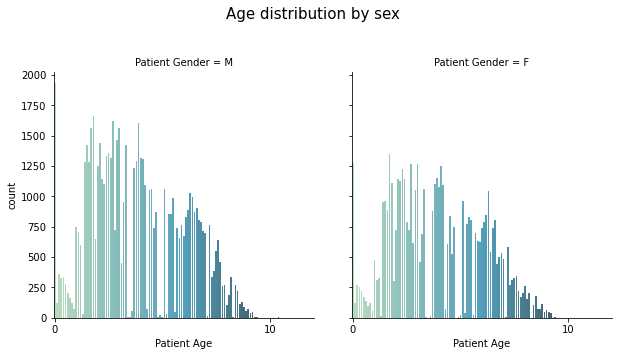

In [52]:
# Let's draw a categorical plot for number of each "Patient Age" value over each "Patient Age" value at ordinal positions
g = sns.catplot(x="Patient Age", col="Patient Gender", data=df, kind="count", aspect=0.8, palette="GnBu_d")
g.set_xticklabels(np.arange(0,121))
g.set_xticklabels(step=10)
g.fig.suptitle('Age distribution by sex', fontsize=15)
g.fig.subplots_adjust(top=.8)
g.figure.set_size_inches(9, 5)

## 1.2 Age distribution

In [53]:
df['Age Type'] = df['Patient Age'].apply(lambda x: x[-1:]) # keep only the last value Y, M or D
df['Age Type'].unique()  # only keep unique values => Y, M and D

df['Age'] = df['Patient Age'].apply(lambda x: x[:-1]).astype(int) # keep all before last digits, e.g. 058 and then remove 0 ->58
# convert those age values in 'Age' column that are in months, 'M' or days, 'D' into years, 'Y'

df.loc[df['Age Type']=='M',['Age']] = df[df['Age Type']=='M']['Age'].apply(lambda x: round(x/12.)).astype(int)

df.loc[df['Age Type']=='D',['Age']] = df[df['Age Type']=='D']['Age'].apply(lambda x: round(x/365.)).astype(int)
df[df['Age Type']=='M']['Age']

df['Age'].sort_values(ascending=False).head(20) # sort the age values in an ascending order

df.loc[df['Patient ID']==5567, ['Patient Age','Finding Labels','Follow-up #']].sort_values('Follow-up #', ascending=True)
df.loc[df['Patient ID']==5567, ['Patient Age','Finding Labels','Follow-up #']].sort_values('Patient Age', ascending=False)
df.head()

,Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,Cardiomegaly,Emphysema,Effusion,Hernia,...,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia,Nothing,Age Type,Age
0,00000001_000,Cardiomegaly,0,1,058Y,M,1,0,0,0,...,0,0,0,0,0,0,0,0,Y,58
1,00000001_001,Cardiomegaly|Emphysema,1,1,058Y,M,1,1,0,0,...,0,0,0,0,0,0,0,0,Y,58
2,00000001_002,Cardiomegaly|Effusion,2,1,058Y,M,1,0,1,0,...,0,0,0,0,0,0,0,0,Y,58
3,00000002_000,No Finding,0,2,081Y,M,0,0,0,0,...,0,0,0,0,0,0,0,1,Y,81
4,00000003_000,Hernia,0,3,081Y,F,0,0,0,1,...,0,0,0,0,0,0,0,0,Y,81


### 1.2.1 Plot age distribution

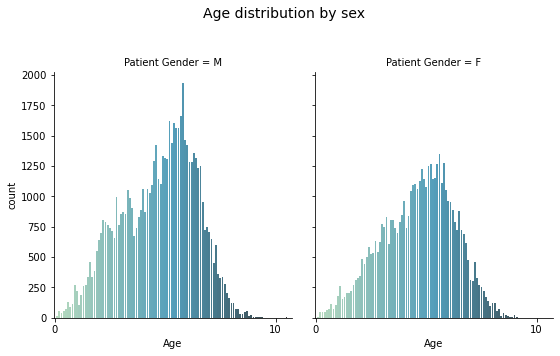

In [54]:
# Let's draw a categorical plot for number of each "Age" value over each "Age" value at ordinal positions
# Do it for each "Patient Gender"
g = sns.catplot(x="Age", col="Patient Gender",data=df, kind="count", aspect=0.8, palette="GnBu_d")
g.set_xticklabels(np.arange(0,108))
g.set_xticklabels(step=10)
g.fig.suptitle('Age distribution by sex', fontsize=14)
g.fig.subplots_adjust(top=.8)

## 1.3 Display pathologies distribution by age and sex

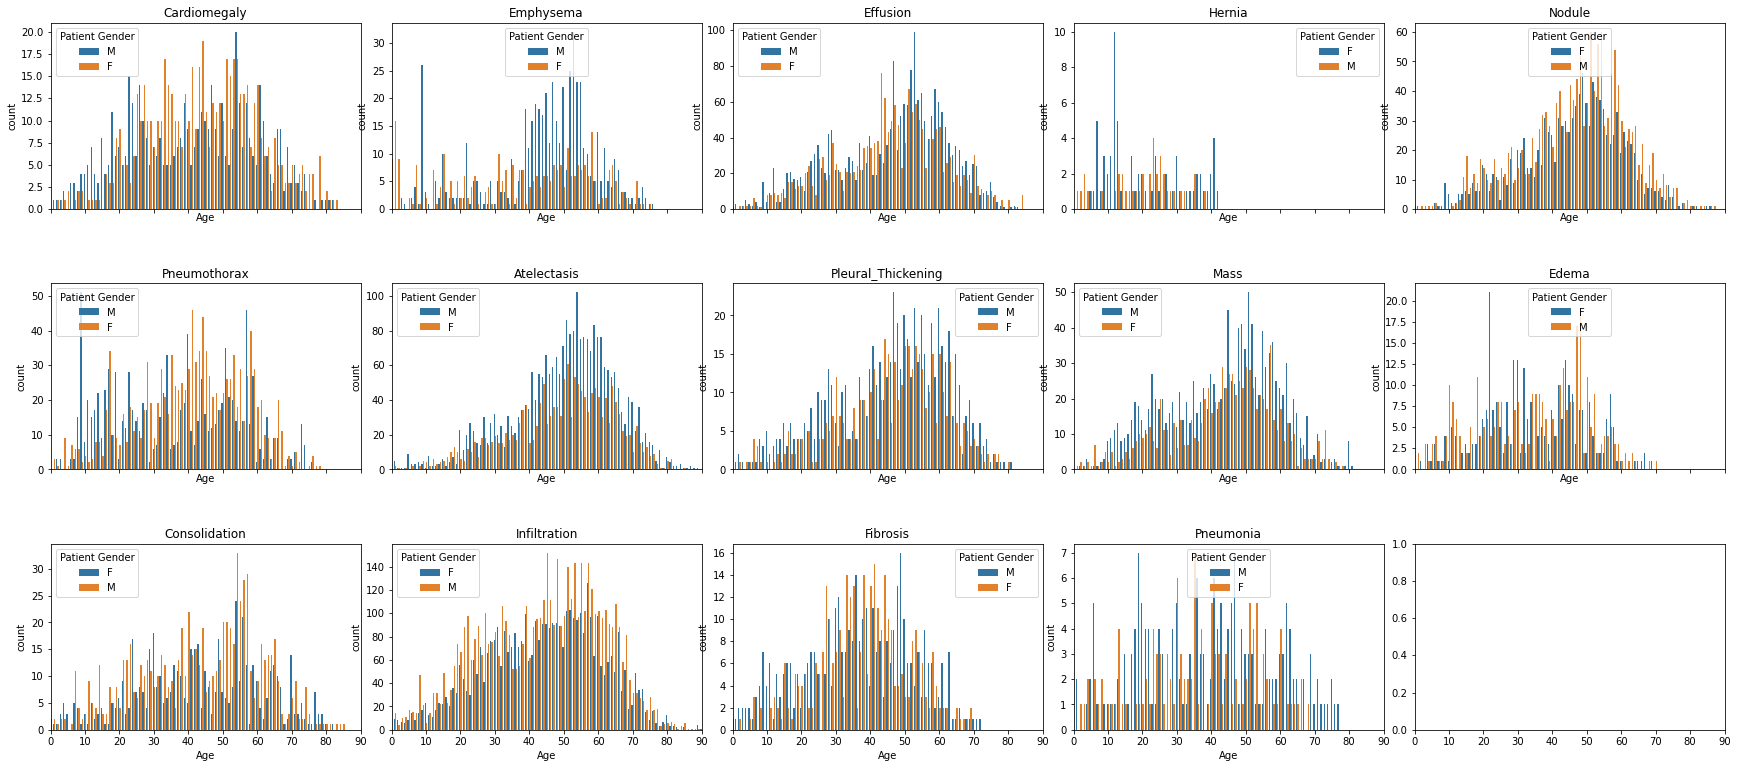

In [65]:
f, axarr = plt.subplots(3, 5, sharex=True, figsize=(30, 13)) # create layout with 7 rows and 2 columns
i,j,x = 0,0,np.arange(0, 100, 10)
for pathology in pathology_list : # Count the occurence of each pathology for each age value for each "Patient Gender"
    g = sns.countplot(x='Age', hue="Patient Gender", data=df[df['Finding Labels']==pathology], ax=axarr[i, j])
    axarr[i, j].set_title(pathology)   
    g.set_xlim(0, 90)
    g.set_xticks(x) # use each 'Age' value as ticks
    g.set_xticklabels(x)
    j = (j + 1) % 5
    if j == 0:
        i = (i + 1) % 7
f.subplots_adjust(hspace=0.4) # height of the padding between subplots for a better view
f.subplots_adjust(wspace=0.1) # width of the padding between subplots for a better view

## 1.4 Display patient number by Follow-up in details

In [56]:
data = df[df['Follow-up #'] < 15] # get those patient data with less that 15 times 'Follow-up #'
data = df[df['Follow-up #']>14] # get those patient data with more  that 15 times 'Follow-up #'

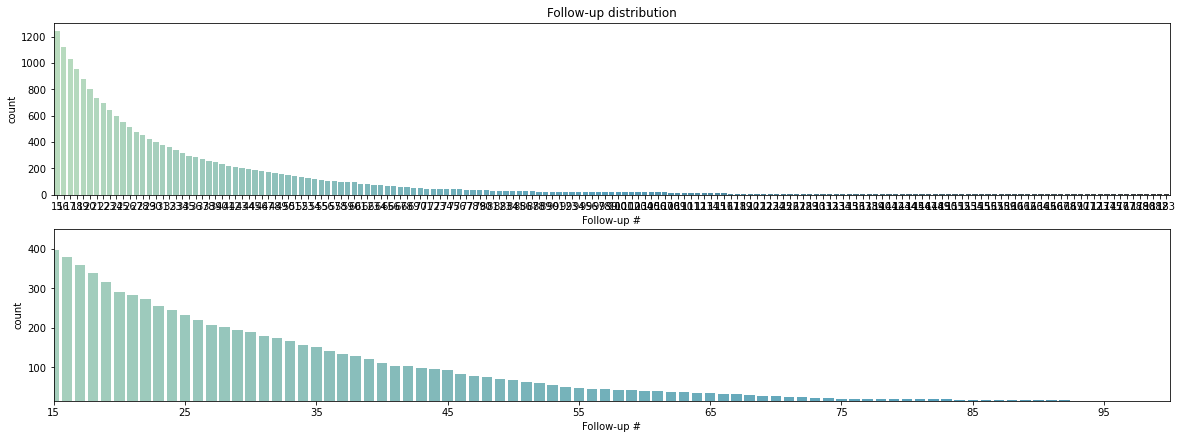

In [57]:
f, (ax1,ax2) = plt.subplots( 2, figsize=(20, 6))
# plot number of patients having each number of 'Follow-up #' in an ordinal distribution
g = sns.countplot(x='Follow-up #', data=data, palette="GnBu_d", ax=ax1)
ax1.set_title('Follow-up distribution')
# plot number of patients having each number of 'Follow-up #' in an ordinal distribution
g = sns.countplot(x='Follow-up #', data=data, palette="GnBu_d", ax=ax2)
x = np.arange(15,100,10)
g.set_ylim(15,450)
g.set_xlim(15,100)
g.set_xticks(x)
g.set_xticklabels(x)
f.subplots_adjust(top=1)

## 1.5 Try to find links between pathologies

In [58]:
# Group dataframe by 'Finding Labels' column and count all the values for each
# sort them based on 'Patient ID' column values in an ascending order
data = df.groupby('Finding Labels').count().sort_values('Patient ID', ascending=False)
df1 = data[['|' in index for index in data.index]].copy()  # those rows containing information of many labels
df2 = data[['|' not in index for index in data.index]]     # those rows containing information of at least one label
df2 = df2[['No Finding' not in index for index in df2.index]] 
df2['Finding Labels'] = df2.index.values  # Simple Pathology dataframe 
df1['Finding Labels'] = df1.index.values  # Multiple Pathology dataframe

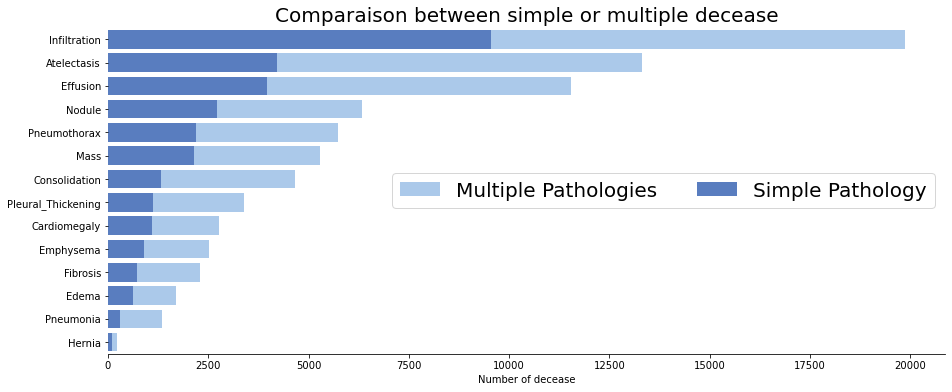

In [59]:
f, ax = plt.subplots(sharex=True, figsize=(15, 6))
sns.set_color_codes("pastel")
g = sns.countplot(y='Category',data=data1, ax=ax, order = data1['Category'].value_counts().index,color='b',label="Multiple Pathologies")
sns.set_color_codes("muted")
g = sns.barplot(x='Patient ID', y='Finding Labels', data=df2, ax=ax, color="b", label="Simple Pathology")
ax.legend(ncol=2, loc="center right", frameon=True, fontsize=20)
ax.set(ylabel="", xlabel="Number of decease")
ax.set_title("Comparaison between simple or multiple decease", fontsize=20)
sns.despine(left=True)

# 2. Sleep data analysis

## 2.1 Data Analysis

In [60]:
import mne
from mne.datasets.sleep_physionet.age import fetch_data
# load two data files of two subjects 
ALICE, BOB = 0, 1
[alice_files, bob_files] = fetch_data(subjects=[ALICE, BOB], recording=[1])
# read one file from SC4001E0-PSG.edf
raw_train = mne.io.read_raw_edf(
    alice_files[0], stim_channel="Event marker", infer_types=True, preload=True
)

# read annotations from SC4001EC-Hypnogram.edf
annot_train = mne.read_annotations(alice_files[1])
raw_train.set_annotations(annot_train, emit_warning=False)

Using default location ~/mne_data for PHYSIONET_SLEEP...
Extracting EDF parameters from C:\Users\nasta\mne_data\physionet-sleep-data\SC4001E0-PSG.edf...
EDF file detected
Channel 'EEG Fpz-Cz' recognized as type EEG (renamed to 'Fpz-Cz').
Channel 'EEG Pz-Oz' recognized as type EEG (renamed to 'Pz-Oz').
Channel 'EOG horizontal' recognized as type EOG (renamed to 'horizontal').
Channel 'Resp oro-nasal' recognized as type RESP (renamed to 'oro-nasal').
Channel 'EMG submental' recognized as type EMG (renamed to 'submental').
Channel 'Temp rectal' recognized as type TEMP (renamed to 'rectal').
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7949999  =      0.000 ... 79499.990 secs...


<RawEDF | SC4001E0-PSG.edf, 7 x 7950000 (79500.0 s), ~424.6 MB, data loaded>

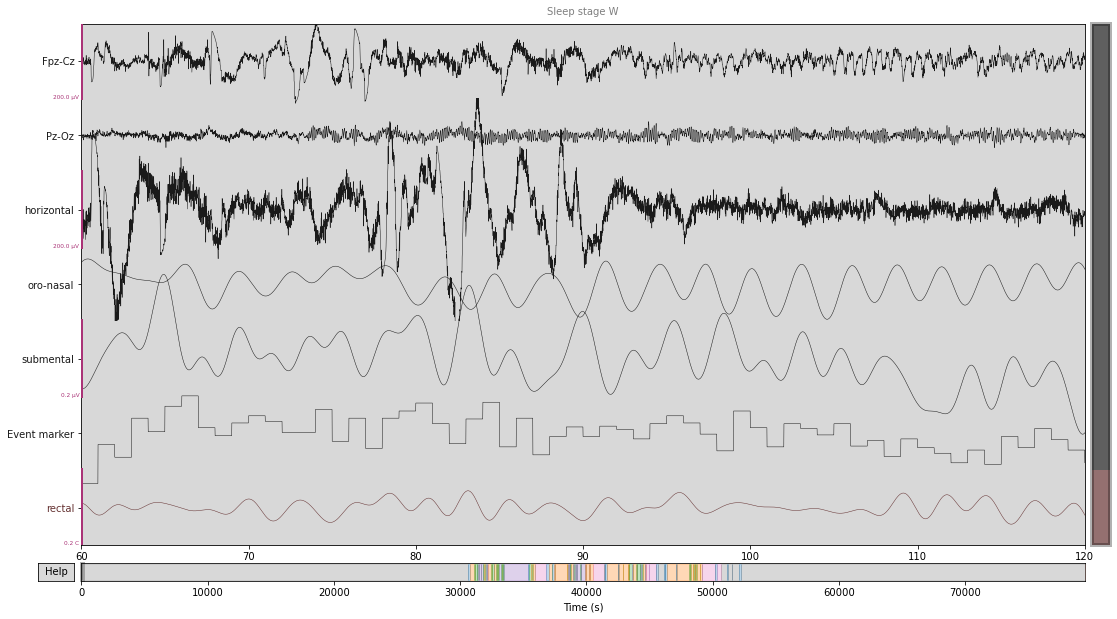

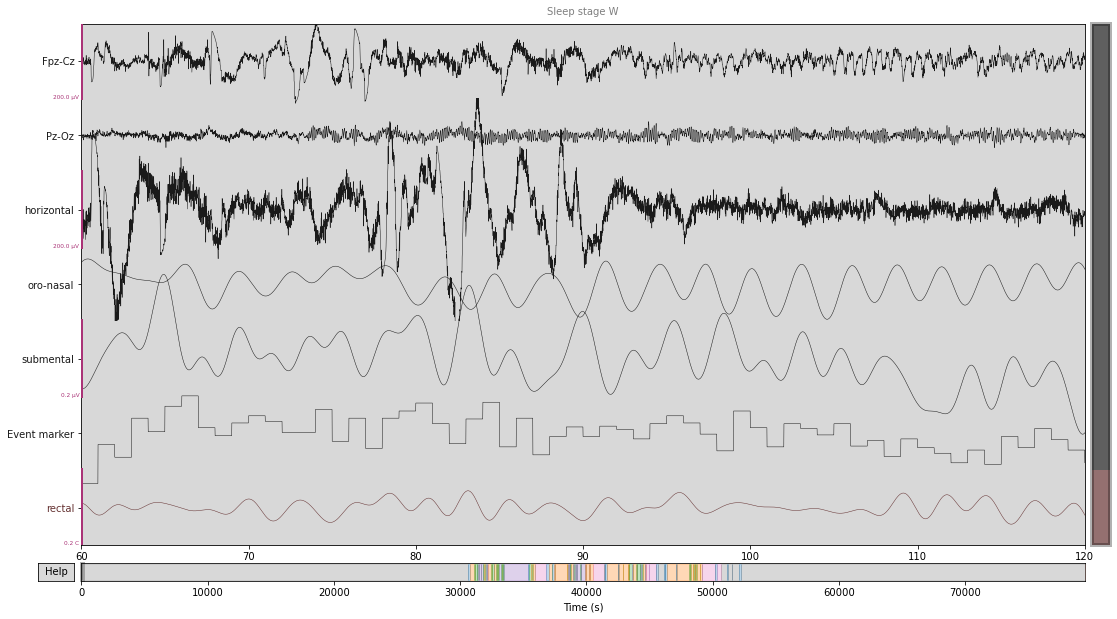

In [64]:
# plot some data
# scalings were chosen manually to allow for simultaneous visualization of
# different channel types in this specific dataset
raw_train.plot(
    start = 60,
    duration = 60,
    scalings = dict(eeg=1e-4, resp=1e3, eog=1e-4, emg=1e-7, misc=1e-1),
)

### 2.1.1 Create Epochs

In [62]:
annotation_desc_2_event_id = {
    "Sleep stage W": 1,
    "Sleep stage 1": 2,
    "Sleep stage 2": 3,
    "Sleep stage 3": 4,
    "Sleep stage 4": 4,
    "Sleep stage R": 5,
}

# create a new event_id that unifies stages 3 and 4
event_id = {
    "Sleep stage W": 1,
    "Sleep stage 1": 2,
    "Sleep stage 2": 3,
    "Sleep stage 3/4": 4,
    "Sleep stage R": 5,
}

#select which events are we interested in and
events_train, _ = mne.events_from_annotations(
    raw_train, event_id=annotation_desc_2_event_id, chunk_duration=30.0
)

# Create Epochs from the data based on the events found in the annotations
tmax = 30.0 - 1.0 / raw_train.info["sfreq"]  # tmax in included , number od samples

epochs_train = mne.Epochs(
    raw=raw_train,
    events=events_train,
    event_id=event_id,
    tmin=0.0,
    tmax=tmax,
    baseline=None,
)

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
2650 matching events found
No baseline correction applied
0 projection items activated
